Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [177]:
import requests
import csv
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [178]:
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to download the data.")
        return None


def process_data(data):
    processed_data = []
    for item in data:
        year_str = item.get('year', '')
        year = None
        if year_str:
            try:
                year = datetime.strptime(year_str, "%Y-%m-%dT%H:%M:%S.%f").strftime("%Y-%m-%d")
            except ValueError:
                pass
        try:
          processed_data.append({
            'Name of Earth Meteorite': item.get('name', ''),
            'id': item.get('id', ''),
            'nametype': item.get('nametype', ''),
            'recclass': item.get('recclass', ''),
            'mass': float(item["mass"]),
            'year': year,
            'reclat': float(item.get('reclat', 0)),
            'reclong': float(item.get('reclong', 0)),
            'point coordinates': [int(item['geolocation']['coordinates'][0]), int(item['geolocation']['coordinates'][1])]
        })
          
        except KeyError:
          processed_data.append({
            'Name of Earth Meteorite': item.get('name', ''),
            'id': item.get('id', ''),
            'nametype': item.get('nametype', ''),
            'recclass': item.get('recclass', ''),
            'mass': float(item.get('mass (g)', 0)),
            'year': year,
            'reclat': float(item.get('reclat', 0)),
            'reclong': float(item.get('reclong', 0)),
            'point coordinates': None
        })

    return processed_data

In [179]:
data_url = "https://data.nasa.gov/resource/y77d-th95.json"

data = download_data(data_url)

if data is not None:
    structured_data = process_data(data)

In [180]:
df=pd.DataFrame(structured_data)

In [181]:
df.head()

,Name of Earth Meteorite,id,nametype,recclass,mass,year,reclat,reclong,point coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6, 50]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10, 56]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99, 16]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64, -33]"


In [182]:
year=[]
for date in df['year']:
  if date =="921-01-01":
    date=date.replace("921-01-01","1921-01-01")
  elif date=="861-01-01":
    date=date.replace("861-01-01","1861-01-01")
  else:
    date=date
  if date is None:
    a=None
  else:
    a=datetime.strptime(date, '%Y-%m-%d').year
  year.append(a)

In [183]:
len(year)

1000

In [184]:
# Get all Earth meteorites that fell before the year 2000
print("1) Get all Earth meteorites that fell before the year 2000")
year=[]
for date in df['year']:
  if date =="921-01-01":
    date=date.replace("921-01-01","1921-01-01")
  elif date=="861-01-01":
    date=date.replace("861-01-01","1861-01-01")
  else:
    date=date
  if date is None:
    a=None
  else:
    a=datetime.strptime(date, '%Y-%m-%d').year
  year.append(a)

earth_meteorites_before_2000 = [y for y in year if y is not None and y <  2000]
print("Here {} Earth meteorites that fell before the year 2000".format(len(earth_meteorites_before_2000)))

1) Get all Earth meteorites that fell before the year 2000
Here 929 Earth meteorites that fell before the year 2000


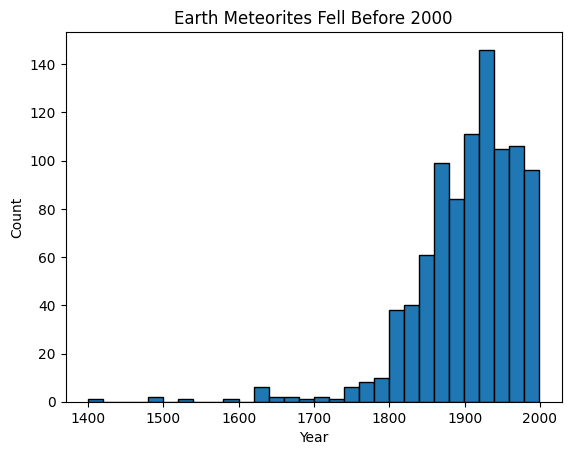

In [185]:
#Earth meteorites year distribution
years = earth_meteorites_before_2000
plt.hist(years, bins=30, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Earth Meteorites Fell Before 2000')
plt.show()

In [186]:
df['Year']=year

In [187]:
# Get the coordinates of Earth meteorites that fell before the year 1970
print("2) Get the coordinates of Earth meteorites that fell before the year 1970")
coordinates_before_1970=df[['reclat','reclong']][df['Year'] < 1970]
print("Here {} coordinates of Earth meteorites that fell before the year 1970".format(len(coordinates_before_1970)))

2) Get the coordinates of Earth meteorites that fell before the year 1970
Here 780 coordinates of Earth meteorites that fell before the year 1970


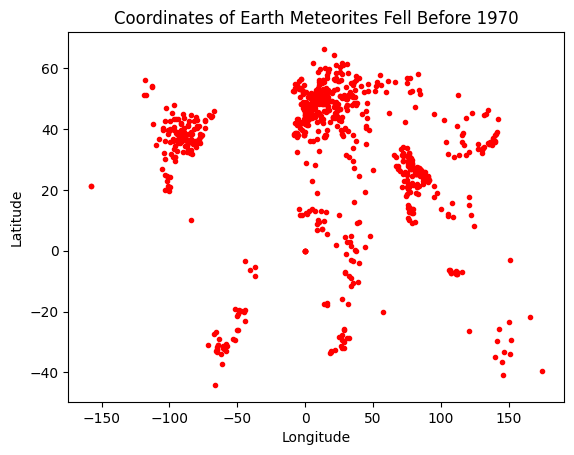

In [188]:
# plot
lats=coordinates_before_1970["reclat"]
longs=coordinates_before_1970["reclong"]
plt.scatter(longs, lats, marker='.', color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates of Earth Meteorites Fell Before 1970')
plt.show()

In [189]:
# Get all Earth meteorites with a mass greater than 10000 kg
print("3) Get all Earth meteorites with a mass greater than 10000 kg")
earth_meteorites_over_10000kg = df[['Name of Earth Meteorite','mass']][df['mass'] > 10000]
print("Here {} Earth meteorites with a mass greater than 10000 kg".format(len(earth_meteorites_over_10000kg)))

3) Get all Earth meteorites with a mass greater than 10000 kg
Here 243 Earth meteorites with a mass greater than 10000 kg


In [190]:
print(earth_meteorites_over_10000kg)

    Name of Earth Meteorite      mass
2                      Abee  107000.0
7                      Agen   30000.0
11                      Aïr   24000.0
16                  Akyumak   50000.0
27               Alfianello  228000.0
..                      ...       ...
991               Tieschitz   28000.0
992                  Tilden   74800.0
994                Timochin   65500.0
997                   Tjabe   20000.0
998                Tjerebon   16500.0

[243 rows x 2 columns]
